In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import ipywidgets as widgets
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual

### MRSA Data Cleaning (DONE)

In [169]:
# mrsa_2013_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2013.csv')
# mrsa_2014_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2014.csv')
# mrsa_2015_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2015.csv')

In [171]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2016.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2016_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2016.csv', encoding=result['encoding'])

In [172]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2017.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2017_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2017.csv', encoding=result['encoding'])

In [173]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2018.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2018_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2018.csv', encoding=result['encoding'])

In [246]:
# mrsa_2013 = mrsa_2013_raw[['Year ','State','HAI','Facility_Name1',
#                         'FACID1','County','Infection_Count','Patient_Days']].dropna()
# mrsa_2013 = mrsa_2013.rename(columns={'Year ':'Year','Facility_Name1':'Facility1',
#                                       'FACID1':'Facility1_ID','Patient_Days':'Num_patients'})
# mrsa_2013 = mrsa_2013.drop(mrsa_2013.loc[mrsa_2013["County"] == 'Kings-Fresno'].index)

In [192]:
# mrsa_2014 = mrsa_2014_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Cases','Patient_Days',]].dropna()
# mrsa_2014 = mrsa_2014.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID','Cases':'Infection_Count',
#                                        'Patient_Days':'Num_patients'})

In [193]:
# mrsa_2015 = mrsa_2015_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Hospital_Onset_Cases',
#                            'Patient_Days']].dropna()
# mrsa_2015 = mrsa_2015.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID',
#                                       'Hospital_Onset_Cases':'Infection_Count','Patient_Days':'Num_patients',})

In [194]:
# mrsa_2016 = mrsa_2016_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2016 = mrsa_2016.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [195]:
# mrsa_2017 = mrsa_2017_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2017 = mrsa_2017.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [196]:
# mrsa_2018 = mrsa_2018_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2018 = mrsa_2018.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [247]:
# mrsa_2013.to_csv('mrsa cleaned data/mrsa_2013.csv',index=False)
# mrsa_2014.to_csv('mrsa cleaned data/mrsa_2014.csv',index=False)
# mrsa_2015.to_csv('mrsa cleaned data/mrsa_2015.csv',index=False)
# mrsa_2016.to_csv('mrsa cleaned data/mrsa_2016.csv',index=False)
# mrsa_2017.to_csv('mrsa cleaned data/mrsa_2017.csv',index=False)
# mrsa_2018.to_csv('mrsa cleaned data/mrsa_2018.csv',index=False)

In [248]:
# mrsa_merged = pd.concat([mrsa_2013, mrsa_2014, mrsa_2015, mrsa_2016, mrsa_2017, mrsa_2018],ignore_index=True)

# mrsa_merged.to_csv('mrsa cleaned data/mrsa_merged.csv',index=False)

### EDA

In [249]:
#load in mrsa data

mrsa_2013 = pd.read_csv('mrsa cleaned data/mrsa_2013.csv')
mrsa_2014 = pd.read_csv('mrsa cleaned data/mrsa_2014.csv')
mrsa_2015 = pd.read_csv('mrsa cleaned data/mrsa_2015.csv')
mrsa_2016 = pd.read_csv('mrsa cleaned data/mrsa_2016.csv')
mrsa_2017 = pd.read_csv('mrsa cleaned data/mrsa_2017.csv')
mrsa_2018 = pd.read_csv('mrsa cleaned data/mrsa_2018.csv')

mrsa_merged = pd.read_csv('mrsa cleaned data/mrsa_merged.csv')

In [204]:
mrsa_2013.head()

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
0,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Hanford",40000122,Kings-Fresno,2.0,42875.0
1,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Reedley",40000124,Fresno,0.0,5970.0
2,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"AHMC Anaheim Regional Medical Center, Anaheim",60000002,Orange,3.0,51929.0
3,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Alameda County Medical Center, Oakland",140000034,Alameda,7.0,55590.0
4,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alameda Hospital,140000011,Alameda,0.0,11520.0


(array([214.,  72.,  37.,  15.,   7.,   2.,   1.,   1.,   3.,   2.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

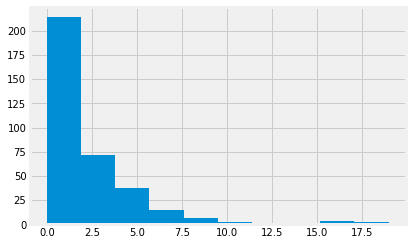

In [205]:
### Histogram of Infection Counts ###

plt.hist(mrsa_2013['Infection_Count'])

(array([297.,  41.,   8.,   6.,   2.,   1.,   0.,   1.,   1.,   1.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

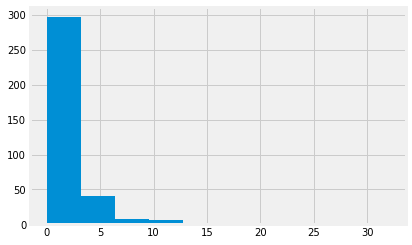

In [206]:
plt.hist(mrsa_2014['Infection_Count'])

(array([258.,  52.,  34.,   6.,   5.,   0.,   3.,   1.,   0.,   3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

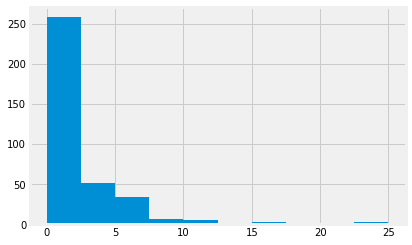

In [207]:
plt.hist(mrsa_2015['Infection_Count'])

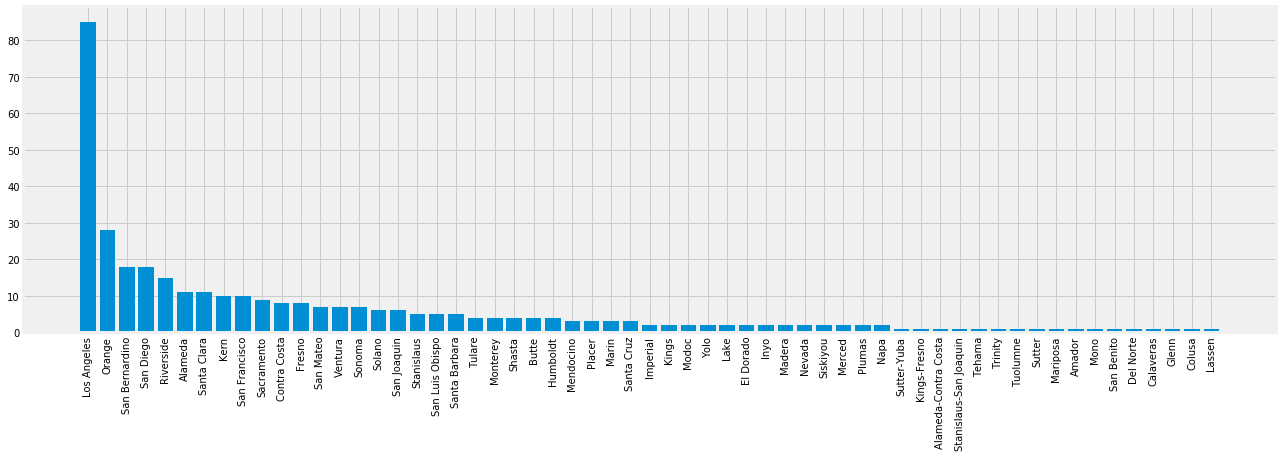

In [208]:
### Bar plots of County Count ### 

plt.figure(figsize=(20,6))

plt.bar(mrsa_2013['County'].value_counts().index, mrsa_2013['County'].value_counts());

plt.xticks(rotation=90);

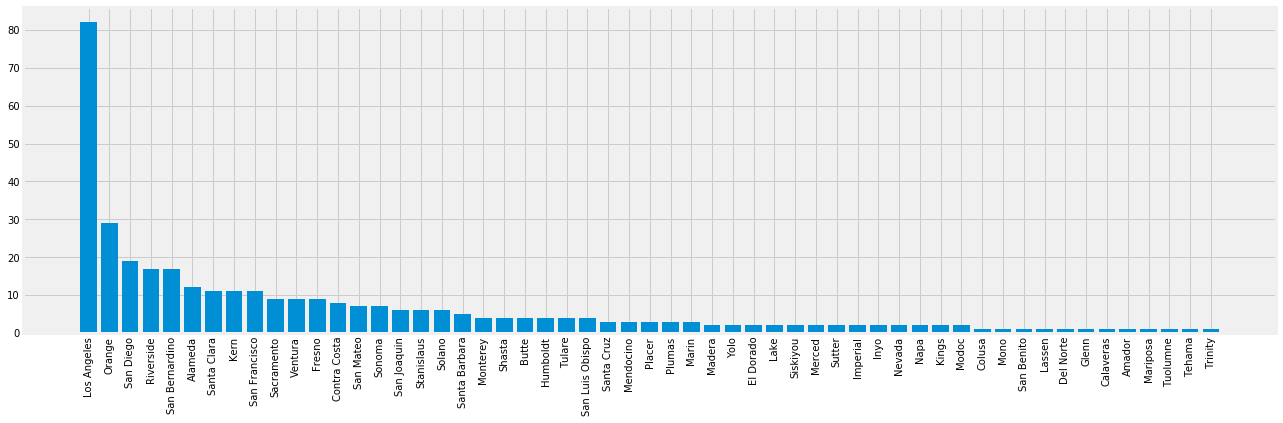

In [209]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2014['County'].value_counts().index, mrsa_2014['County'].value_counts());

plt.xticks(rotation=90);

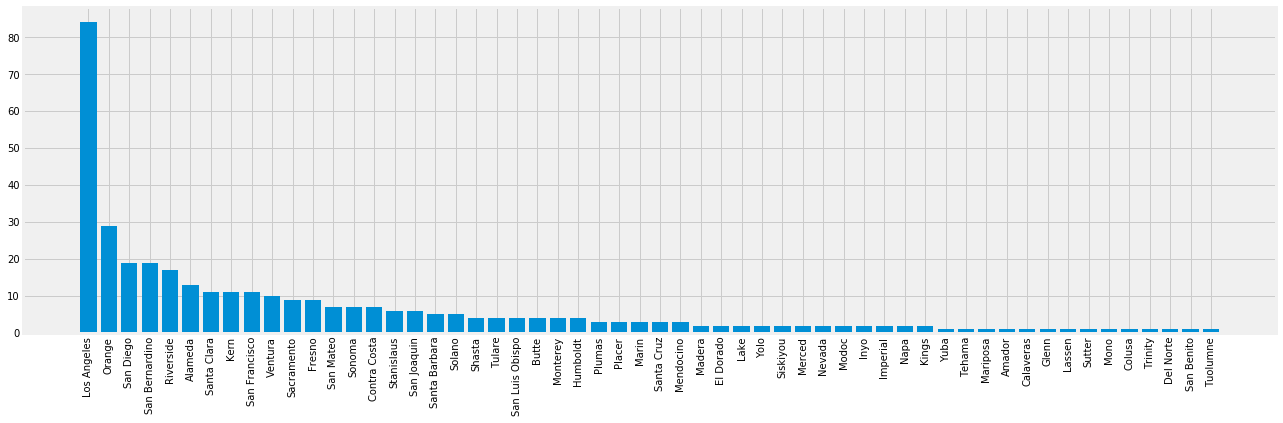

In [210]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2015['County'].value_counts().index, mrsa_2015['County'].value_counts());

plt.xticks(rotation=90);

In [211]:
# below we tried to plot infection rates in LA county as reported by each unique hospital per data set. 
# However, it seems that not all of the same hospitals were used to record infection count over each year 

# Confusion: What is a useful plot to graph for infection rate by year by county (Sec 5c)
# 

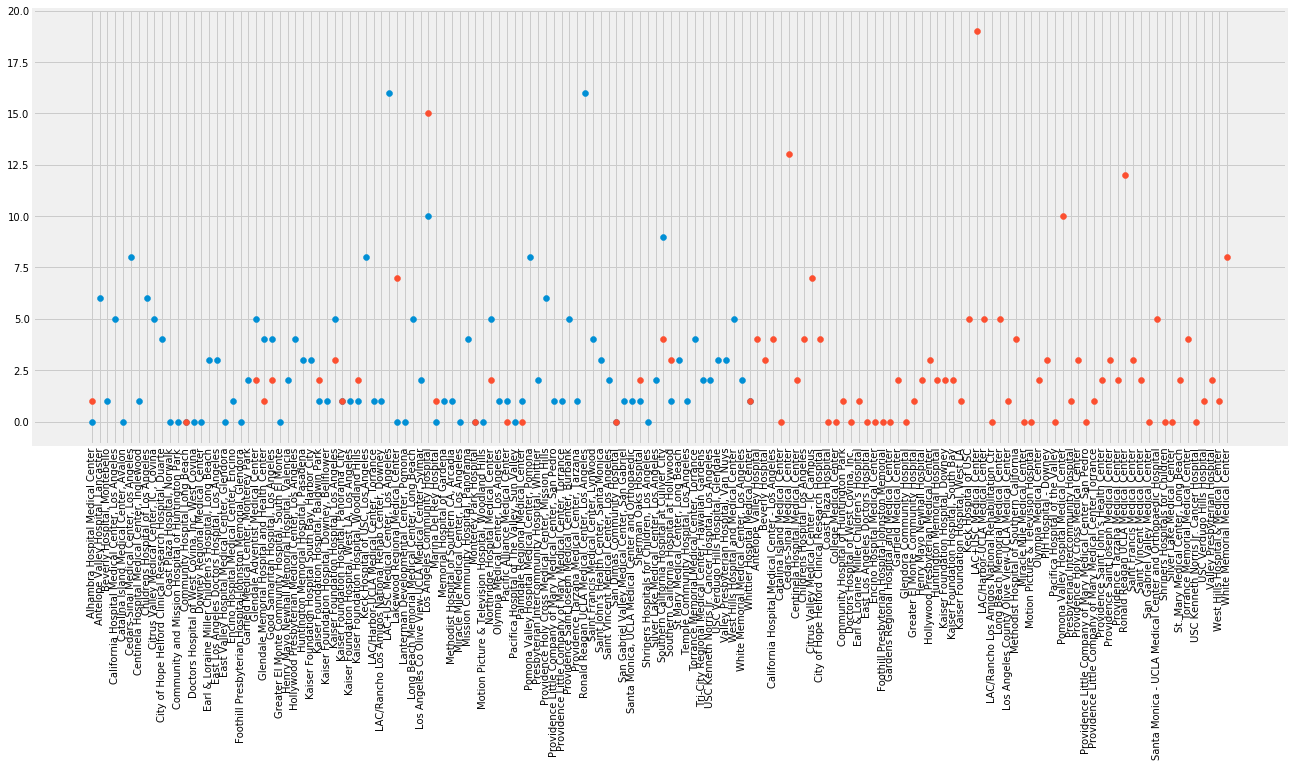

In [212]:
## Infection Rate by County by Year
plt.figure(figsize=(20,8))
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

hospitals = la_2013['Facility1']
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']


plt.scatter(hospitals, la_2013['Infection_Count'])
plt.scatter(la_2014['Facility1'], la_2014['Infection_Count'])

plt.xticks(rotation=90);

In [213]:
la_2013.columns

Index(['Year', 'State', 'HAI', 'Facility1', 'Facility1_ID', 'County',
       'Infection_Count', 'Num_patients'],
      dtype='object')

In [214]:
len(la_2014['Facility1'].unique()) == len(la_2013['Facility1'].unique())

False

In [215]:
a = ['a','b','c']
b = ['b','c','d']

ab = [set(a) & set(b)]
ab

[{'b', 'c'}]

In [216]:
len(la_2013['Facility1']), len(la_2014['Facility1']), len(la_2015['Facility1']) # not the same hospitals

(85, 82, 84)

In [217]:
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

#[set(la_2014['Facility_Name1']) & set(la_2015['Facility_Name1'])]

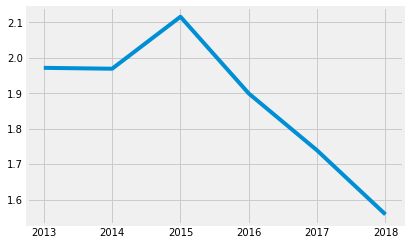

In [218]:
# infection rates by year
avg_inf_year = [np.mean(mrsa_2013['Infection_Count']),
                np.mean(mrsa_2014['Infection_Count']),
                np.mean(mrsa_2015['Infection_Count']),
                np.mean(mrsa_2016['Infection_Count']),
                np.mean(mrsa_2017['Infection_Count']),
                np.mean(mrsa_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #one possible version of 5B 

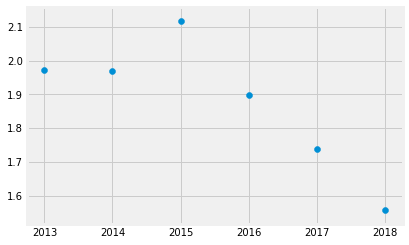

In [219]:
plt.scatter(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #another version of 5B 

In [220]:
merge_1 = pd.merge(mrsa_2013, mrsa_2014, 
         how='outer',on='County').dropna()

In [221]:
mrsa_2015

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
0,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Adventist Medical Center,630012960,Kings,2,33672
1,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Adventist Medical Center - Reedley,40000124,Fresno,0,7125
2,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Adventist Medical Center - Selma,40000122,Fresno,0,7286
3,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,AHMC Anaheim Regional Medical Center,60000002,Orange,0,49819
4,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alameda Hospital,140000011,Alameda,0,14217
5,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alhambra Hospital Medical Center,930000005,Los Angeles,1,16823
6,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alta Bates Summit Medical Center,140000425,Alameda,2,61891
7,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alta Bates Summit Medical Center - Alta Bates ...,140000012,Alameda,2,67045
8,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alvarado Hospital Medical Center,90000013,San Diego,8,26768
9,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Anaheim Global Medical Center,60000074,Orange,0,37103


In [222]:
census.head()

,County,Year,Total_Population
0,Alameda County,2013,1580247
1,Alameda County,2013,97356
2,Alameda County,2013,98218
3,Alameda County,2013,92259
4,Alameda County,2013,95483


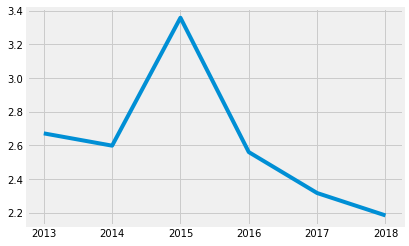

In [223]:
# trying again by county - plot average infection rate per year for each county

la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']
la_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Los Angeles']
la_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Los Angeles']
la_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Los Angeles']



avg_inf_year_la = [np.mean(la_2013['Infection_Count']),
                   np.mean(la_2014['Infection_Count']), 
                   np.mean(la_2015['Infection_Count']), 
                   np.mean(la_2016['Infection_Count']),
                   np.mean(la_2017['Infection_Count']), 
                   np.mean(la_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_la)

In [241]:
mrsa_merged.loc[mrsa_merged['County'] == 'Kings-Fresno']

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
0,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Hanford",40000122.0,Kings-Fresno,2.0,42875.0


In [251]:
def line_county(County):
    plt.figure(figsize=(10,7));
    x = list(mrsa_merged.loc[mrsa_merged['County']== County].groupby(['Year']).agg(sum).index)
    y = list(mrsa_merged.loc[mrsa_merged['County']== County].groupby(['Year']).agg(sum)['Infection_Count'])
    return plt.plot(x,y)

wid_1 = widgets.Dropdown(
        options = mrsa_merged['County'].unique().tolist(),
        description = 'County',
        disabled = False
)

interact(line_county, County = wid_1)

interactive(children=(Dropdown(description='County', options=('Fresno', 'Orange', 'Alameda', 'Los Angeles', 'S…

<function __main__.line_county(County)>

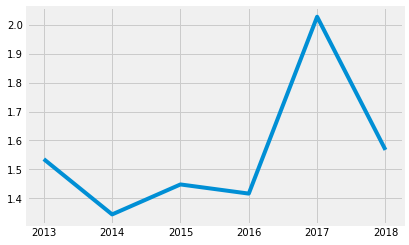

In [224]:
# trying again by county - plot average infection rate per year for each county

orange_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Orange']
orange_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Orange']
orange_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Orange']
orange_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Orange']
orange_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Orange']
orange_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Orange']



avg_inf_year_orange = [np.mean(orange_2013['Infection_Count']),
                   np.mean(orange_2014['Infection_Count']), 
                   np.mean(orange_2015['Infection_Count']), 
                   np.mean(orange_2016['Infection_Count']),
                   np.mean(orange_2017['Infection_Count']), 
                   np.mean(orange_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_orange)

In [92]:
avg_inf_year_orange

[1.5357142857142858,
 1.3448275862068966,
 1.4482758620689655,
 1.4166666666666667,
 2.027027027027027,
 1.5675675675675675]

In [93]:
la_2015

,Unnamed: 0,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
5,5,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alhambra Hospital Medical Center,930000005,Los Angeles,1,16823
10,10,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Antelope Valley Hospital,930000008,Los Angeles,3,90048
18,18,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Beverly Hospital,930000012,Los Angeles,4,38986
19,19,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,California Hospital Medical Center - Los Angeles,930000002,Los Angeles,7,80800
24,24,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Catalina Island Medical Center,930000013,Los Angeles,0,234
25,25,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Cedars-Sinai Medical Center,930000004,Los Angeles,16,258100
26,26,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Centinela Hospital Medical Center,930000022,Los Angeles,2,71621
31,31,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Children's Hospital Los Angeles,930000034,Los Angeles,2,105815
35,35,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,Citrus Valley Medical Center - IC Campus,930000070,Los Angeles,6,94328
36,36,2015,California,Methicillin-Resistant Staphylococcus aureus Bl...,City of Hope Helford Clinical Research Hospital,930000036,Los Angeles,5,63290


### Population Data Cleaning (DONE)

In [138]:
# population versus infection

#census_raw = pd.read_csv('cc-est2018-alldata-06.csv')
#census = census_raw[['CTYNAME','YEAR','TOT_POP']]

 # @Elias: is it ok to only keep these 3 columns? other columns won't be used necessarily


In [139]:
# # keep only relevant years
#census = census[census['YEAR'].isin([6,7,8,9,10,11])]

# # rename year numbers to actual years
#year_dict = {6:2013,7:2014,8:2015,9:2016,10:2017,11:2018}
#census['YEAR'] = census['YEAR'].replace(year_dict)
#census = census.rename(columns={"CTYNAME":"County", "YEAR":"Year","TOT_POP":"Total_Population"})

#census.to_csv('census_cleaned.csv',index=False)

# Pop Data EDA

In [141]:
census = pd.read_csv('census_cleaned.csv')
census.head()

,County,Year,Total_Population
0,Alameda County,2013,1580247
1,Alameda County,2013,97356
2,Alameda County,2013,98218
3,Alameda County,2013,92259
4,Alameda County,2013,95483


In [145]:
pop_by_county = census.groupby(['Year','County']).agg(sum)
pop_by_county.head()

Total_Population
Year County                            
2013 Alameda County             3160494
     Alpine County                 2254
     Amador County                73250
     Butte County                443328
     Calaveras County             89320

In [148]:
pop_by_county = pop_by_county.reset_index()
pop_by_county['County'] = pop_by_county['County'].apply(lambda county_name:re.sub(r' County',"",county_name))
pop_by_county.head()

,index,Year,County,Total_Population
0,0,2013,Alameda,3160494
1,1,2013,Alpine,2254
2,2,2013,Amador,73250
3,3,2013,Butte,443328
4,4,2013,Calaveras,89320


In [149]:
infec_2013 = list(mrsa_2013.groupby(['County']).agg(sum)['Infection_Count'])
infec_2014 = list(mrsa_2014.groupby(['County']).agg(sum)['Infection_Count'])
infec_2015 = list(mrsa_2015.groupby(['County']).agg(sum)['Infection_Count'])
infec_2016 = list(mrsa_2016.groupby(['County']).agg(sum)['Infection_Count'])
infec_2017 = list(mrsa_2017.groupby(['County']).agg(sum)['Infection_Count'])
infec_2018 = list(mrsa_2018.groupby(['County']).agg(sum)['Infection_Count'])

In [150]:
#infec_by_county_2013

In [151]:
## population versus infection rate for each county
    ##  not all years have the same number of counties, so we cannot put all infection counts into one dataframe

infec_by_county_2013 = mrsa_2013.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2014 = mrsa_2014.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2015 = mrsa_2015.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2016 = mrsa_2016.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2017 = mrsa_2017.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2018 = mrsa_2018.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()

In [153]:
merge_2013 = pd.merge(infec_by_county_2013, pop_by_county.loc[pop_by_county['Year'] == 2013], 
         how='left',on='County').dropna()
merge_2014 = pd.merge(infec_by_county_2014, pop_by_county.loc[pop_by_county['Year'] == 2014], 
         how='left',on='County').dropna()
merge_2015 = pd.merge(infec_by_county_2015, pop_by_county.loc[pop_by_county['Year'] == 2015], 
         how='left',on='County').dropna()
merge_2016 = pd.merge(infec_by_county_2016, pop_by_county.loc[pop_by_county['Year'] == 2016], 
         how='left',on='County').dropna()
merge_2017 = pd.merge(infec_by_county_2017, pop_by_county.loc[pop_by_county['Year'] == 2017], 
         how='left',on='County').dropna()
merge_2018 = pd.merge(infec_by_county_2018, pop_by_county.loc[pop_by_county['Year'] == 2018], 
         how='left',on='County').dropna()

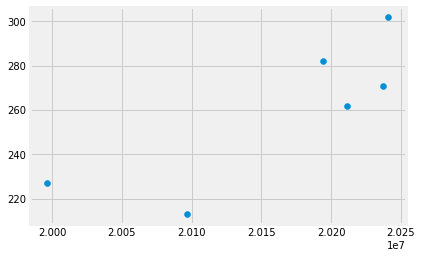

In [157]:
## line plot of total pop vs infection count in la county -- pop v inf in all years
## idea is to produce a similar plot with regression line for every county over all years 
    # (not all years have the same counties)
    

la_inf = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['Infection_Count'].values[0]])
la_pop = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['Total_Population'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['Total_Population'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['Total_Population'].values[0]])
plt.scatter(la_pop,la_inf)